# Play sound and vibrate LRA base on sound 

Play the foot step sound and then using the LRA to mimic the vibration of different sound wave

### 1. Helper Function

In [29]:
import wave
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, VBox, IntProgress
from IPython.display import display
import pydualsense

def plot_sound(file_path):
    # Plot the sound wave
    wf = wave.open(file_path, 'rb')
    signal = wf.readframes(-1)
    signal = np.frombuffer(signal, dtype='int16')
    framerate = wf.getframerate()
    time = np.linspace(0, len(signal) / framerate, num=len(signal))

    plt.figure(1)
    plt.title(f'Sound Wave - {file_path}')
    plt.plot(time, signal)
    plt.show()

def play_audio_haptics_realtime(dualsense: pydualsense, wav_file_path: str, intensity_scale: float = 1.0):
    """
    Plays a WAV file as haptic feedback on the DualSense controller while simultaneously playing the audio.
    
    Args:
        dualsense: The DualSense controller instance
        wav_file_path: Path to the WAV file
        intensity_scale: Scale factor for vibration intensity (0.0 to 1.0)
    """
    CHUNK = 1024
    
    # Open the WAV file
    wf = wave.open(wav_file_path, 'rb')
    
    # Initialize PyAudio
    p = pyaudio.PyAudio()
    
    # Create audio stream
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                   channels=wf.getnchannels(),
                   rate=wf.getframerate(),
                   output=True)
    
    print(f"Playing audio and haptics from {wav_file_path}")
    
    try:
        data = wf.readframes(CHUNK)
        while len(data) > 0:
            # Play audio
            stream.write(data)
            
            # Convert to numpy array for haptics processing
            audio_data = np.frombuffer(data, dtype=np.int16)
            
            # If stereo, convert to mono
            if wf.getnchannels() == 2:
                audio_data = audio_data.reshape(-1, 2).mean(axis=1)
            
            # Calculate intensity
            intensity = float(np.mean(np.abs(audio_data)) / np.iinfo(np.int16).max)
            intensity = intensity * intensity_scale  # Apply scaling
            intensity = max(0.0, min(1.0, intensity))  # Clamp between 0 and 1
            
            # Set vibration
            dualsense.setLeftMotor(int(intensity * 255))
            
            # Read next chunk
            data = wf.readframes(CHUNK)
            
    except KeyboardInterrupt:
        print("\nPlayback interrupted")
    finally:
        # Cleanup
        stream.stop_stream()
        stream.close()
        p.terminate()
        dualsense.setLeftMotor(0)
        wf.close()




In [23]:
#  play example sound 

footstep_sound1 = "./sound/footsteps-1.wav"
footstep_sound2 = "./sound/footsteps-5.wav"
footstep_sound3_snow = "./sound/walking-in-snow-1.wav"
footstep_sound4_woodenstairs = "./sound/wooden-stairs-2.wav"

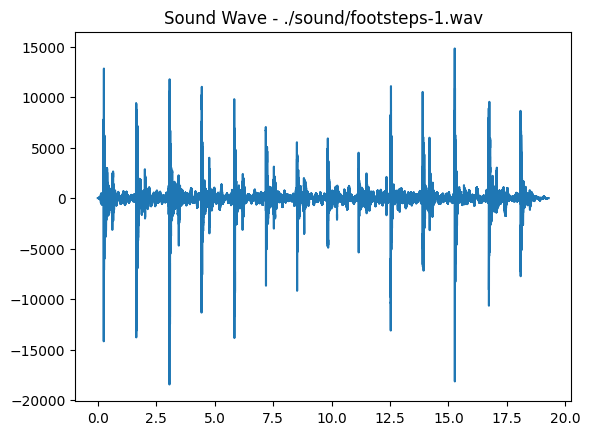

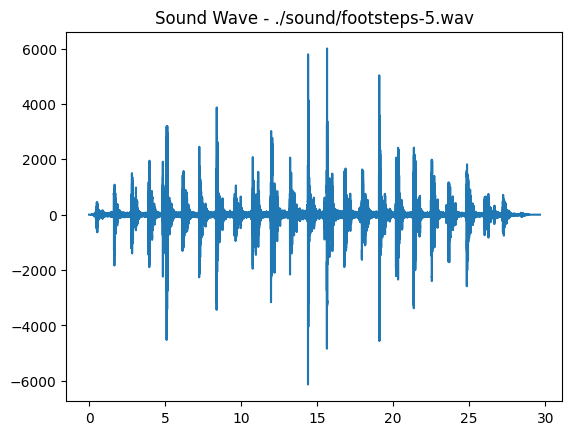

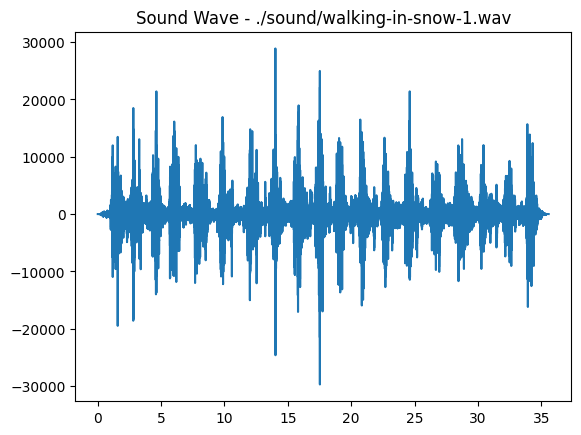

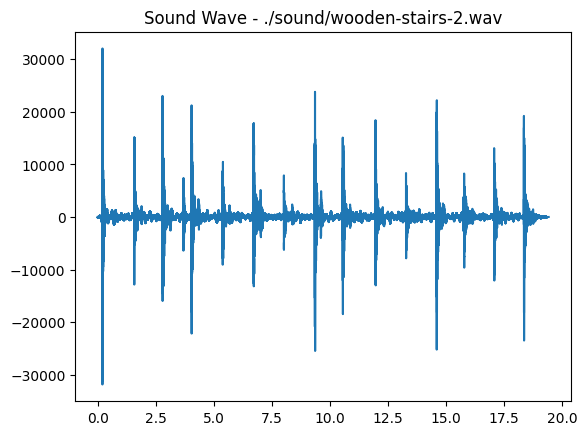

In [10]:
for sound in [footstep_sound1, footstep_sound2, footstep_sound3_snow, footstep_sound4_woodenstairs]:
    plot_sound(sound)

In [31]:
dualsense = pydualsense.pydualsense()
dualsense.init()

play_audio_haptics_realtime(dualsense, footstep_sound1, intensity_scale=1.0)

dualsense.close()

||PaMacCore (AUHAL)|| Warning on line 521: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Warning on line 441: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Error on line 1332: err='-10851', msg=Audio Unit: Invalid Property Value


OSError: [Errno -9986] Internal PortAudio error